In [58]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd

In [60]:
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [62]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [63]:
# reflect an existing database into a new model

Base=automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [64]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [65]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [66]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [67]:
inspector=inspect(engine)

# Exploratory Climate Analysis

#### Station Table

In [68]:
stations=engine.execute('SELECT * FROM Station')

In [69]:
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [70]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [71]:
columns=inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#### Measurement

In [72]:
measurements=engine.execute('SELECT * FROM Measurement LIMIT 15')

In [73]:
print(measurements.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [74]:
measurements.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [75]:
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


#### Exploratory Climate Analysis

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [77]:
# Calculate the date 1 year ago from the last data point in the database
latest_date=(session.query(measurement.date)
                    .order_by(measurement.date.desc())
                    .first())
latest_date

('2017-08-23')

In [78]:
# Perform a query to retrieve the data and precipitation scores
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Query Date:', year_ago_date)

Query Date: 2016-08-23


In [79]:
#Max Precipitation Scores For The Last Year in The Dataset
year_prcp=(session.query(measurement.date,func.max(measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',measurement.date) > year_ago_date)
                  .group_by(measurement.date)
                  .all())
year_prcp

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [80]:
# Precipitation Query Results as Pandas DataFrame
prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
prcp_df.head(10)


,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46
2016-09-01,0.02


In [81]:
# Sort the dataframe by date
prcp_df.sort_values('date')

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


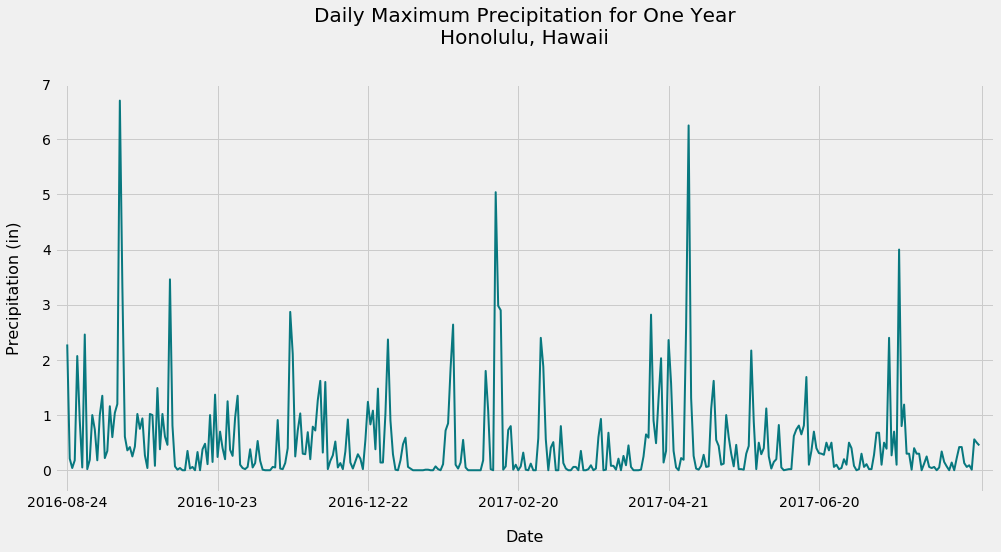

In [82]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,7)
prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:deep aqua')

plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend('',frameon=False)
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Maximum Precipitation for One Year\nHonolulu, Hawaii',fontsize=20,pad=40)

plt.show()

In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prcp_stats=(session.query(measurement.date, measurement.prcp)
                        .filter(measurement.date > year_ago_date)
                        .all())

# Design a query to show how many stations are available in this dataset?
year_prcp_stats_df=pd.DataFrame(year_prcp_stats, columns=['date', 'prcp'])
year_prcp_stats_df
year_prcp_stats_df.dropna()


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2216,2017-08-17,0.13
2218,2017-08-19,0.09
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [84]:
#summary statistics for the precipitation data
year_prcp_stats_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?


In [86]:
# Number of Stations
total_stations=session.query(station).count()
print(f'There are {total_stations} stations at Honolulu, Hawaii.')

There are 9 stations at Honolulu, Hawaii.


In [87]:
# Station Activity
# List the stations and the counts in descending order.
station_activity=(session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Min, Avg, and Max Temperature Records of The Most Active Station
sel=[measurement.station, 
             func.min(measurement.tobs), 
             func.max(measurement.tobs), 
             func.avg(measurement.tobs)]

most_active_st=(session.query(*sel)
                       .filter(measurement.station=='USC00519281')
                       .all())
most_active_st

most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [89]:
# Choose the Station with the Highest Number of Temperature Observations
# Design a Query to Retrieve the Last 12 Months of Temperature Observation Data for this Station
year_tobs=(session.query(measurement.date,(measurement.tobs))
                  .filter(func.strftime(measurement.date) > year_ago_date)
                  .filter(measurement.station=='USC00519281')
                  .all())
year_tobs


[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

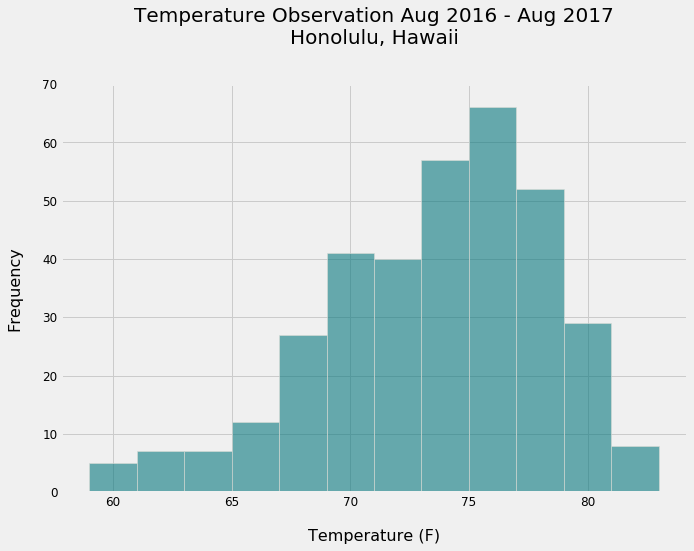

In [90]:
# Save the Query Results as a Pandas DataFrame
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='xkcd:deep aqua')

plt.title('Temperature Observation Aug 2016 - Aug 2017\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()


In [91]:
tobs_df.index = pd.to_datetime(tobs_df.index, infer_datetime_format = True)
June_df=tobs_df[tobs_df.index.month==6]
Dec_df=tobs_df[tobs_df.index.month==12]

In [92]:
June_df.mean()

tobs    74.766667
dtype: float64

In [93]:
Dec_df.mean()

tobs    70.419355
dtype: float64

## Bonus Challenge Assignment

In [94]:
### Temperature Analysis I
# June Average Temperature
june_averages = session.query(func.avg(measurement.tobs)).\
    filter(func.strftime("%m", measurement.date) == "06").first()


# December Average Temperature
dec_averages = session.query(func.avg(measurement.tobs)).\
    filter(func.strftime("%m", measurement.date) == "12").first()


#print(f"There are {stations_count} stations in this dataset.")

print(f"Monthly Average Temperatures\n\
June = {june_averages[0]}\n\
December = {dec_averages[0]}")

Monthly Average Temperatures
June = 74.94411764705882
December = 71.04152933421226


In [95]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
# Unpaired T test (because we have two independent samples.)

# June has 1700 rows while December has 1517 rows.  Limit June rows to 1517.
june_temps = session.query(measurement.tobs).filter(func.strftime("%m", measurement.date) == "06").all()
june_temps

dec_temps = session.query(measurement.tobs).filter(func.strftime("%m", measurement.date) == "12").all()
dec_temps

t_test_up = stats.ttest_ind(june_temps,dec_temps, equal_var = False)
t_test_up

Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

In [96]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [97]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = calc_temps("2014-08-04", "2014-08-18")
my_trip

[(68.0, 76.68932038834951, 83.0)]

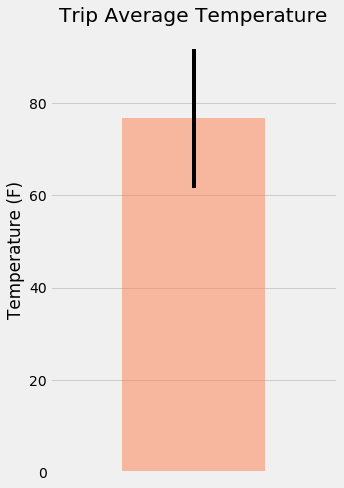

In [98]:
# Load the Results as a Pandas DataFrame
my_trip_df = pd.DataFrame(my_trip, columns=["TMIN", "TAVG", "TMAX"])

my_trip_df.plot.bar(y="TAVG", yerr=(my_trip_df["TMAX"] - my_trip_df["TMIN"]), 
                    title="Trip Average Temperature", color="coral", 
                    alpha=0.5, figsize=(5,7), legend=None)
plt.xticks([])
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.savefig("Images/trip_average_temperature.png")
plt.show()


In [99]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


start_date = dt.date(2014, 8, 4)
end_date = dt.date(2014, 8, 18)

sel = ([station.station, 
        station.name, 
        func.sum(measurement.prcp), 
        station.latitude, 
        station.longitude, 
        station.elevation
       ])

stationRain = (session.query(*sel)
                   .filter(station.station == measurement.station)
                   .filter(measurement.date >= start_date)
                   .filter(measurement.date <= end_date)
                   .group_by(station.station)
                   .order_by(func.sum(measurement.prcp).desc())
                   .all())

#convert query object to data frame
stationRainTable = pd.DataFrame(np.array(stationRain))
#rename columns
stationRainTable = stationRainTable.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})

stationRainTable

,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",3.73,21.3331,-157.8025,152.4
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.6900000000000002,21.5213,-157.8374,7.0
2,USC00519281,"WAIHEE 837.5, HI US",1.58,21.45167,-157.84888999999998,32.9
3,USC00513117,"KANEOHE 838.1, HI US",0.99,21.4234,-157.8015,14.6
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.9600000000000001,21.33556,-157.71139,19.5
5,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.56,21.3152,-157.9992,0.9
6,USC00519397,"WAIKIKI 717.2, HI US",0.22,21.2716,-157.8168,3.0
7,USC00517948,"PEARL CITY, HI US",0.02,21.3934,-157.9751,11.9


In [104]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [108]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
startDate = "2017-03-14"
endDate = "2018-03- 14"


# Use the start and end date to create a range of dates
dates = session.query(measurement.date).filter(measurement.date >= startDate).filter(measurement.date <= endDate).group_by(measurement.date).all()
vacation_dates = [x[0] for x in dates]

# Stip off the year and save a list of %m-%d strings
while start_date <= end_date:
    normals.append(daily_normals(start_date.strftime("%m-%d")))
    start_date += day

# Stip off the year and save a list of %m-%d strings
vacation_dates_strip= [x[5:] for x in vacation_dates]
start_month_day = vacation_dates_strip[0]
end_month_day = vacation_dates_strip[-1]

# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normals = [session.query(func.min(measurement.tobs),
                func.avg(measurement.tobs),
                func.max(measurement.tobs)).filter(func.strftime("%m-%d", measurement.date) >= start_month_day).filter(func.strftime("%m-%d", measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", measurement.date)).all()]

daily_normals = daily_normals[0]
print("Aggregated Daily Normals for 08-07 to 08-14")
daily_normals



Aggregated Daily Normals for 08-07 to 08-14


[(62.0, 70.32758620689656, 77.0),
 (58.0, 68.54716981132076, 76.0),
 (60.0, 69.70370370370371, 78.0),
 (57.0, 68.54, 75.0),
 (57.0, 67.7843137254902, 76.0),
 (60.0, 69.1, 75.0),
 (62.0, 70.11764705882354, 80.0),
 (60.0, 71.07692307692308, 77.0),
 (65.0, 71.75471698113208, 77.0),
 (63.0, 70.79629629629629, 78.0),
 (62.0, 71.5, 77.0),
 (63.0, 71.5, 78.0),
 (64.0, 71.38, 80.0),
 (63.0, 71.53846153846153, 80.0),
 (59.0, 71.51785714285714, 82.0),
 (58.0, 71.35714285714286, 77.0),
 (62.0, 72.17543859649123, 79.0),
 (61.0, 71.875, 79.0),
 (60.0, 71.87931034482759, 80.0),
 (53.0, 71.82142857142857, 79.0),
 (55.0, 72.2280701754386, 78.0),
 (58.0, 72.01639344262296, 78.0),
 (61.0, 72.28813559322033, 80.0),
 (67.0, 71.57142857142857, 77.0),
 (63.0, 71.10526315789474, 78.0),
 (66.0, 72.10526315789474, 77.0),
 (62.0, 71.6140350877193, 78.0),
 (64.0, 71.40350877192982, 79.0),
 (65.0, 72.49180327868852, 82.0),
 (65.0, 72.22413793103448, 80.0),
 (64.0, 71.52542372881356, 79.0),
 (65.0, 72.75, 81.0),
 

In [109]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df= pd.DataFrame(daily_normals,columns=['min', 'avg', 'max'])
daily_normals_df['date']= vacation_dates
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')
daily_normals_df.set_index('date',inplace=True)
daily_normals_df

,min,avg,max
date,,,
2017-03-14,62.0,70.327586,77.0
2017-03-15,58.0,68.547170,76.0
2017-03-16,60.0,69.703704,78.0
2017-03-17,57.0,68.540000,75.0
2017-03-18,57.0,67.784314,76.0
...,...,...,...
2017-08-19,69.0,75.946429,85.0
2017-08-20,68.0,76.452830,82.0
2017-08-21,67.0,76.400000,83.0


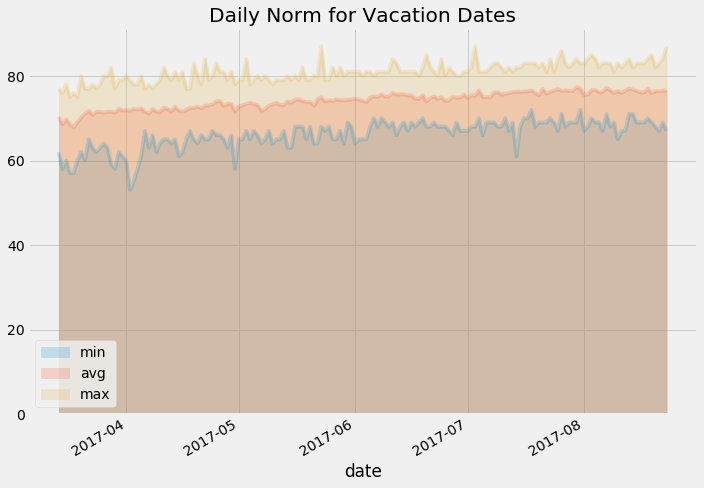

In [110]:
# Plot the daily normals as an area plot with `stacked=False`

daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Daily Norm for Vacation Dates")
plt.tight_layout()
plt.savefig("Images/DailyNorm.png")
plt.show()